<img src="./pictures/DroneApp_logo.png" style="float:right; max-width: 180px; display: inline" alt="INSA" />
<img src="./pictures/logo_sizinglab.png" style="float:right; max-width: 100px; display: inline" alt="INSA" />

# Scaling laws of electrical components

*Written by Marc Budinger, Aitor Ochotorena (INSA Toulouse) and Scott Delbecq (ISAE-SUPAERO), Toulouse, France.*

The estimation models calculate the component characteristics requested for their selection without requiring a detailed design. Scaling laws are particularly suitable for this purpose. This notebook illustrates the approach with electrical drone components characteristics.
Validation of the obtained scaling laws is achieved thanks to catalog data.  

The [following article](https://hal.archives-ouvertes.fr/hal-00712986/file/IMECHE_v1.2_full.pdf) gives more details for components of electromechanical actuators:  
>*Budinger, M., Liscouët, J., Hospital, F., & Maré, J. C. (2012). Estimation models for the preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 226(3), 243-259.*  

**Notation**: The x* scaling ratio of a given parameter is calculated as $x^*=\frac{x}{x_{ref}}$ where $x_{ref}$ is the parameter taken as the reference and $x$ the parameter under study.

### Electrical wiring

![Cables](./pictures/cables.jpeg)

Electric conductors cross-section area is elected with nominal current. The design driver on such a component is in fact the maximal insulator temperature. The temperature drop is linked to power losses that are mainly due to the Joule effect:
$P_{loss}=\rho\cdot J^2\cdot V$

where $\rho$ is the resistivity of the conductor, $J$ the current density and $V$ is the conductor volume.

Neglecting the thermal conduction resistance due to the thin insulator thickness, power loss is mainly given by the convection one:

$P_{loss}=h\cdot S\cdot \Delta \theta$

with $h$ as the convection coefficient, $S$ the insulator exchange area ($S=2\pi r L$) and $\Delta \theta$ as the admissible temperature drop (constant for a given external temperature and insulator material: $h^* = 1$ and $\Delta \theta^* = 1$)

Linking both equations and considering that the current is $I=J\cdot S$ we obtain the following scaling laws:

|                | Scaling laws  | References |
| -------------- | -------------------| -----------|
|  |                      |  PVC insulated single wiring cable        |
|Current | $I_{wir}$| $120$ A |
|Current density |$J^*=r^{*-1/2}$||
|Radius |$r^*=I^{*2/3}$|$5.2$ mm|
|Linear resistance|$\frac{R}{L}^*=I^{*-4/3}$| |
|Linear mass|$\frac{M}{L}^*=I^{*4/3}$|$.191$ kg/m |


## Validation with a data plot

We will compare the scaling law with a plot of the catalog data. 

#### Import data

The first step is to import catalog data stored in an excel file. We use for that functions from [Panda](https://pandas.pydata.org/index.html) package (with here an [introduction to panda](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)). 

In [4]:
import pandas as pd

path='./Data/'
df = pd.read_csv(path+'ScalingLawsCables.csv',sep=';',encoding = 'unicode_escape')
df.head()

,TYPE,diameter[mm],R[Ohm/m],Imax[A],Mass[kg],r*,M*,Er,Unnamed: 8
0,Wire,0.51,0.088,3.5,0.001830,0.492714,0.00170839,3.389492e-02,0.033895
1,Wire,0.64,0.052,5.0,0.002882,0.624975,0.002748672,2.347685e-02,NaN
2,Wire,0.81,0.034,6.0,0.004617,0.705749,0.00350508,1.287055e-01,NaN
3,Wire,1.00,0.022,9.5,0.007037,0.958734,0.006468363,4.126573e-02,NaN
4,Wire,1.30,0.013,15.0,0.011893,1.300000,0.011892813,1.710000e-16,NaN


#### Finding an appropriate reference

In order to validate the formulated scaling laws we need to find a good reference to have the least possible error.
To select the best reference point with the lowest possible error with respect to the mass, the average relative error was compared
testing all available data points. 

In [5]:
import pandas as pd
import statistics
import numpy as np
from sklearn.metrics import r2_score

path='./Data/'
df = pd.read_csv(path+'ScalingLawsCables.csv',sep=';',encoding = 'unicode_escape')
ref_count=-1
value_count=0


n=1e15
df=df.loc[df['TYPE'] == 'Wire']
df = df.reset_index(drop=True)

for index, row in df.iterrows():
    allm=[]
    allmass=[]#all mass
    value_count=0
    ref_count+=1
    for index, row in df.iterrows():
        M=df.at[ref_count,'Mass[kg]']*(df.at[value_count,'Imax[A]']/df.at[ref_count,'Imax[A]'])**(4/3)#estimation mass
        allmass.append(M)#all mass
        ER=abs(M-df.at[value_count,'Mass[kg]'])/(df.at[value_count,'Mass[kg]'])#relative error per row
        allm.append(ER)#all relative errors
        MEAN=(np.mean(allm))#average relative error
        value_count+=1
    if MEAN<n:
        n=MEAN
        dmax=df.at[ref_count,'diameter[mm]'] 
        Imax=df.at[ref_count,'Imax[A]'] 
        MREF=df.at[ref_count,'Mass[kg]'] 
        sigma=statistics.stdev(allm)

In [6]:
Imax,MREF

(120.0, 0.19028501)

These are the references of maximum current and mass which give the minimum average relative error in the scaling law.

$r^*=I^{(*1/1.5)}$

Text(0, 0.5, 'r [mm]')

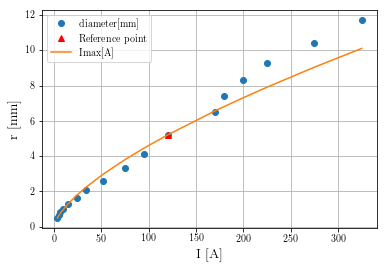

In [8]:
from matplotlib import pyplot as mp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path='./Data/'
df = pd.read_csv(path+'ScalingLawsCables.csv',sep=';',encoding = 'unicode_escape')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

r_ref=5.2#[mm]
I_ref=120#[A]
M_ref=0.19028501#[kg]

plt.plot(df['Imax[A]'], df['diameter[mm]'],'o')
plt.plot(I_ref, r_ref,'^r',label='Reference point')

I=df['Imax[A]']

r=r_ref*(I/I_ref)**(1/1.5)

plt.plot(I,r)

#Here we plot
plt.grid(True,which="both",ls="-")
plt.legend()
plt.xlabel('I [A]',fontsize=14)
plt.ylabel('r [mm]',fontsize=14)

# mp.savefig('rI.pdf',dpi=1200, format='pdf')

$M^*=I^{*2/1.5}$

Text(0, 0.5, '$\\frac{M}{L}$ [kg/m]')

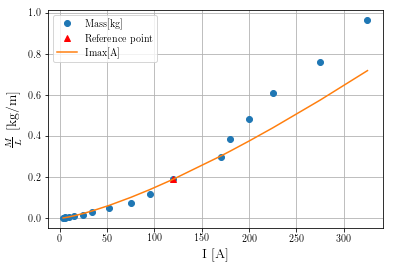

In [9]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as mp
import pandas as pd
import numpy as np

path='./Data/'
df = pd.read_csv(path+'ScalingLawsCables.csv',sep=';',encoding = 'unicode_escape')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')


r_ref=5.2#[mm]
I_ref=120#[A]
M_ref=0.19028501#[kg]

plt.plot(df['Imax[A]'], df['Mass[kg]'],'o')
plt.plot(I_ref, M_ref,'^r',label='Reference point')



I=df['Imax[A]']

M=M_ref*(I/I_ref)**(2/1.5)

plt.plot(I,M)

#Here we plot
#Labelling
#ax1.loglog()
plt.grid(True,which="both",ls="-")
plt.legend()
#ax1.set_title('M=I^(2/1.5) ')
plt.xlabel('I [A]',fontsize=14)
plt.ylabel(r'$\frac{M}{L}$ [kg/m]',fontsize=14)

# plt.savefig('MI.pdf',dpi=1200, format='pdf')